In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [4]:
X = dataset.iloc[:, :].values
#X = dataset.values
#X = dataset.to_numpy()

X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

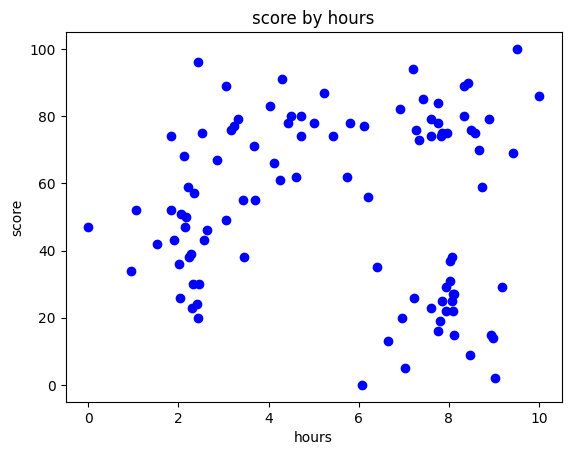

In [5]:
plt.scatter(X[:, 0], X[:, 1], color = 'blue')
#plt.scatter(X['hours'], X['score'], color = 'blue') #에러
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

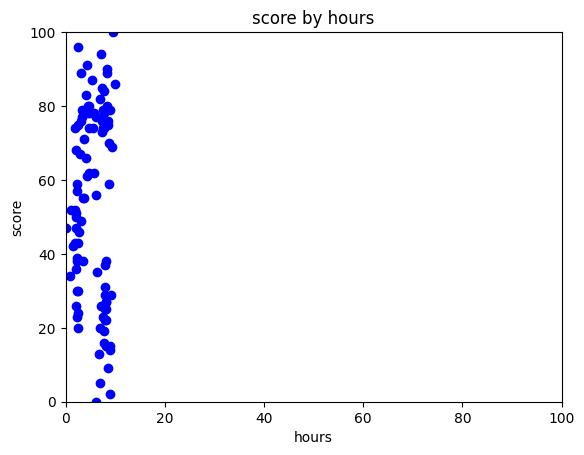

In [6]:
plt.scatter(X[:, 0], X[:, 1], color = 'blue')
#plt.scatter(X['hours'], X['score'], color = 'blue') #에러
plt.title('score by hours')
plt.xlabel('hours')
plt.xlim(0,100)
plt.ylabel('score')
plt.ylim(0,100) # 데이터를 맞춤.
plt.show()

feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler #스케일링을 맞춰주는 메소드
sc = StandardScaler()
X = sc.fit_transform(X) # X=sc.fit(X), X=sc.transform(X)
X[:-5]


array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537],
       [ 0.64615029, -1.07514723],
       [ 0.98282328, -1.49888853],
       [ 0.09251026,  0.31164246],
       [ 1.21101275,  0.19607665],
       [-0.28531166,  0.77390569],
       [-0.18430976,  0.92799344],
       [-1.07088197, -0.30470851],
       [ 0.57133407, -1.88410788],
       [-0.76413547, -0.612884  ],
       [-0.9100271 , -0.18914271],
       [-0.50976032,  0.4657302 ],
       [ 1.37560843, -0.95958142],
       [ 0.79204192,  0.77390569],
       [-1.70307903, -0.76697174],
       [-0.68183762,  0.65833988],
       [ 1.11375166, -1.73002014],
       [-0.98484332,  0.50425214],
       [-1.34396117, -0.42027432],
       [ 0.21969783, -2.07671756],
       [ 1.09504761,  1.39025667],
       [ 0.23466107,  0.8894715 ],
       [-2.05471527, -0.26618658],
       [-1.24670009, -0.15062077],
       [-1.2167736 ,

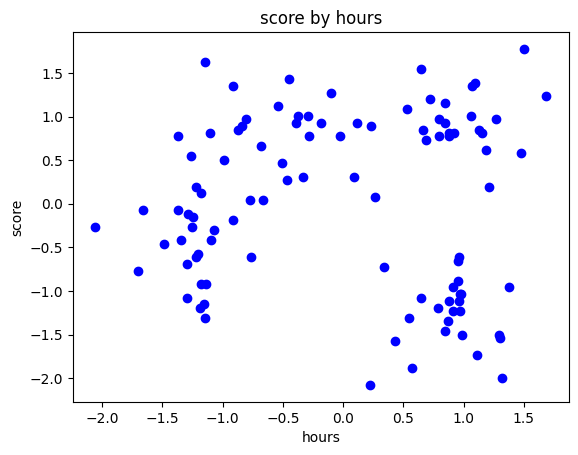

In [8]:
plt.scatter(X[:, 0], X[:, 1], color = 'blue')
#plt.scatter(X['hours'], X['score'], color = 'blue') #에러
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

Optimal k

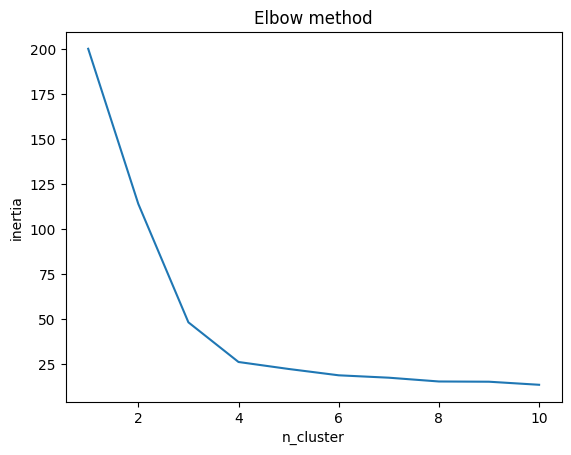

In [9]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 0) #init='random'은 랜덤한 위치
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow method')
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

In [10]:
k = 4  # Optimal k = 4

In [11]:
kmeans = KMeans(n_clusters=k, random_state=0)
#kmeans.fit(X)
y_means = kmeans.fit_predict(X) # X값들을 클러스터링헤서 나온 그룹의 인덱스값

In [12]:
y_means

array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
       3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32)

In [13]:
centers = kmeans.cluster_centers_
centers

array([[-0.54299598,  0.79316666],
       [ 0.96910697,  0.97133061],
       [ 0.8837666 , -1.26929779],
       [-1.24939347, -0.48807293]])

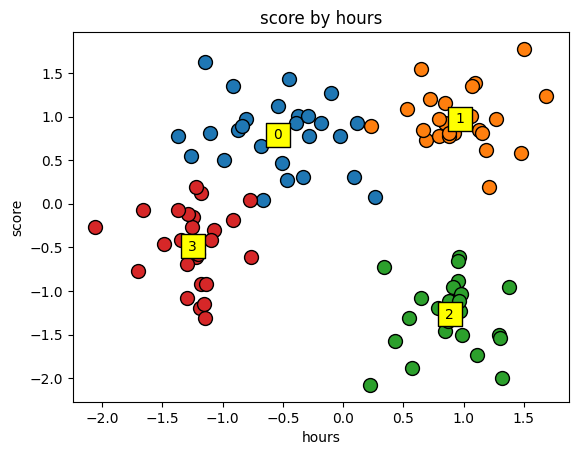

In [14]:
for cluster in range(k):
    plt.scatter(X[y_means == cluster, 0], X[y_means == cluster, 1], s = 100, edgecolors='black') #점 크기, 선색쌀
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolors='black', color= 'yellow', marker = 's')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = 'center', ha = 'center') #vertical array, horizontal array
    
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show() # 이 그룹의 인덱스가 계속 바뀌니깐 모델을 저장해서 쓰면 고정된 걸로 쓸 수 있음

In [15]:
X_org = sc.inverse_transform(X) # 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [16]:
centers_org = sc.inverse_transform(centers)
centers_org[:5]

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

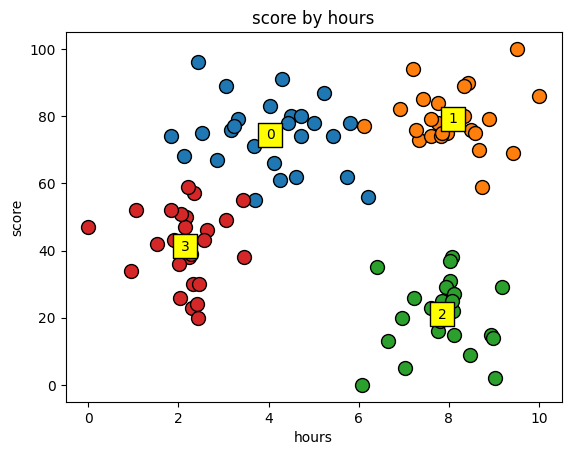

In [17]:
for cluster in range(k):
    plt.scatter(X_org[y_means == cluster, 0], X_org[y_means == cluster, 1], s = 100, edgecolors='black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolors='black', color= 'yellow', marker = 's')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = 'center', ha = 'center')
    
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()
X=iris.data

In [20]:
y=iris.target

In [21]:
y_name = iris.target_names
y_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, verbose=1)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 104.35000000000001.
Iteration 1, inertia 83.39023263888895.
Iteration 2, inertia 82.00418738904196.
Iteration 3, inertia 81.08093414092329.
Iteration 4, inertia 79.87357983461304.
Iteration 5, inertia 79.34436414532674.
Iteration 6, inertia 78.92130972222223.
Iteration 7, inertia 78.85566582597725.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 99.80000000000003.
Iteration 1, inertia 81.58096974898477.
Iteration 2, inertia 80.80637599999997.
Iteration 3, inertia 79.87357983461304.
Iteration 4, inertia 79.34436414532674.
Iteration 5, inertia 78.92130972222223.
Iteration 6, inertia 78.85566582597725.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 106.87.
Iteration 1, inertia 84.46446756632062.
Iteration 2, inertia 79.86398439527464.
Iteration 3, inertia 79.19714263977781.
Iteration 4, inertia 78.851441426146.
Converged at iteration 4: strict convergence.
In

KMeans(n_clusters=3, n_init=10, verbose=1)

In [23]:
idx = kmeans.predict
idx

<bound method _BaseKMeans.predict of KMeans(n_clusters=3, n_init=10, verbose=1)>

In [24]:
centers = kmeans.cluster_centers_
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [25]:
k_set = [2,3,4,5]
names = []
models = []
results = []

for k in k_set:
    names.append('Kmeans_with_k%d' %k)
    model = KMeans(n_clusters=k,init='k-means++', n_init=10, max_iter=300, random_state=0)
    model.fit(X)
    models.append(model)
    results.append(model.predict(X))

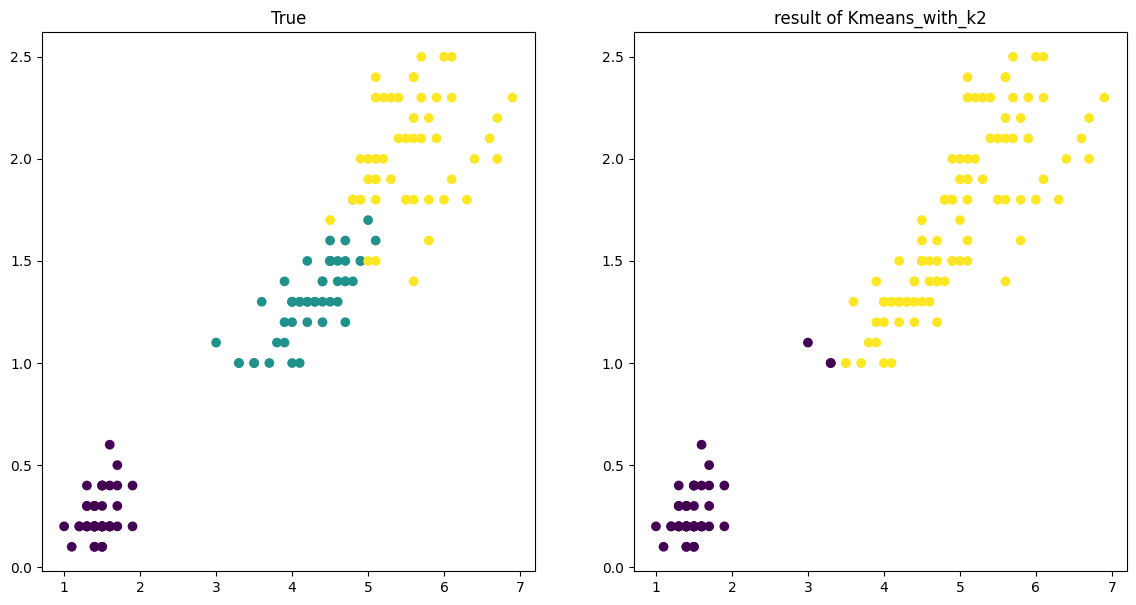

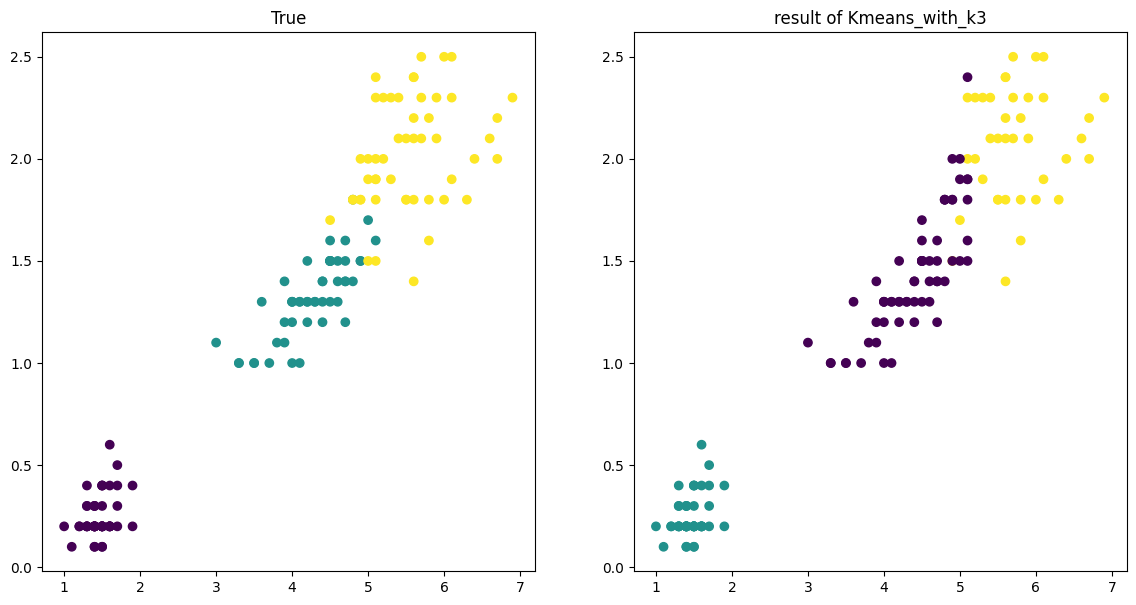

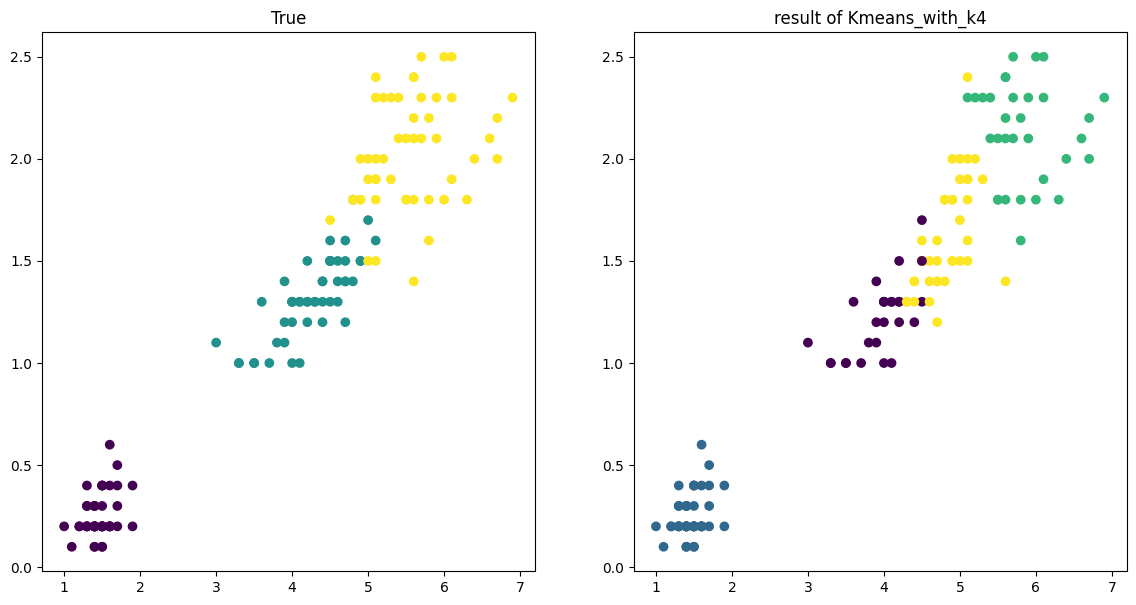

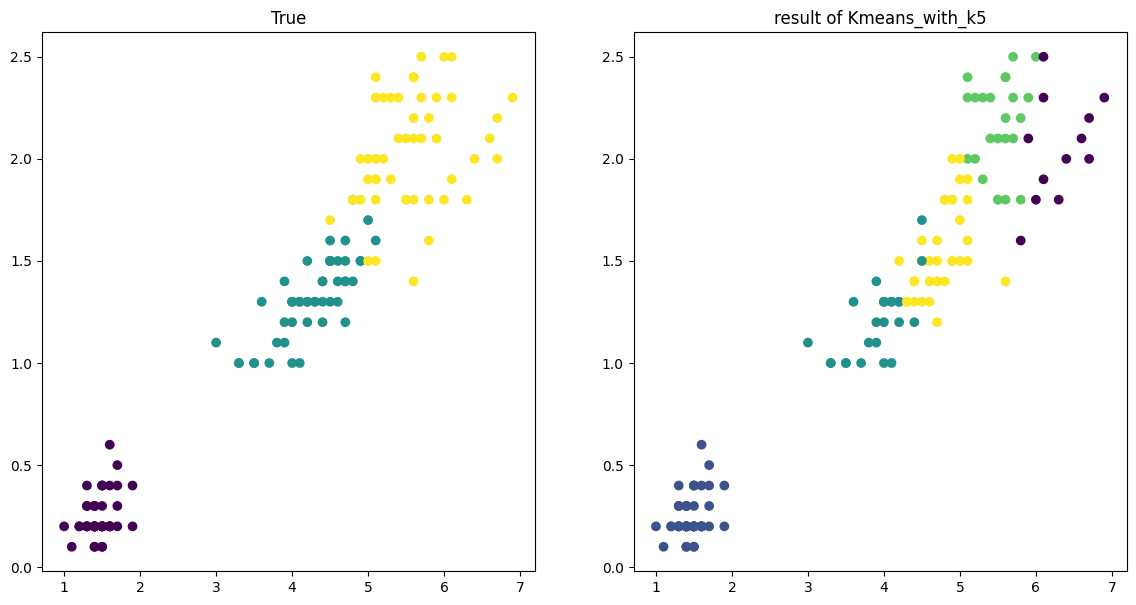

In [26]:
for k, name, result in zip(k_set, names, results):
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.scatter(X[:,2],X[:,3],c=y)
    plt.title('True')

    plt.subplot(1,2,2)
    plt.scatter(X[:,2],X[:,3],c=result)
    plt.title('result of %s' % name)
    plt.show()
